Evaluation of Recommendation System 

http://fastml.com/what-you-wanted-to-know-about-mean-average-precision/

# Non Profit Crowdfunding Recommendation System for DonorsChoose.org 

https://www.donorschoose.org/


<img src="files/donorschooselogo.png">

### Contents

1. [Background](#Background)
2. [Key Business Questions](#KBQs)
3. [Data Overview](#Data_Overview)
4. [Data Pre-processing](#Data_Pre-processing)
5. [Exploratory Data Analysis](#EDA)
6. Recommendation Systems

    i. Content Based Recommendation System    
    ii. Collaborative Recommendation System
    
    
7. Evaluation Criteria 
8. Conclusions

<a id='Background'></a>

### 1. Background

Founded in 2000 by a high school teacher in Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. It allows individuals to donate directly to public schools all over America and actually see how very dollar was spent. Since 2000, DonorsChoose.org has vetted and fulfilled over 1.1 Million classroom project requests (through the support of ~ 3 Million donors) that range from butterfly cocoons, to robotics kits, to Little House on the Prairie. 

However, public school teachers in the US still spend ~ **$1.6B** of their own money on classroom supplies. To get students what they need to learn, DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.

<a id='KBQs'></a>

### 2. Key Business Questions

1. How to pair up classroom requests to donors that will motivate them most to make additional donations?
2. How to understand the interests of different donors to help them make better donation decisions?

The above questions will eventually help answer the key decision of - *Building targeted email campaigns recommending specific classroom requests to prior donors.*

<a id='Data_Overview'></a>

### 3. Data Overview

Source - https://www.kaggle.com/donorschoose/io

DonorsChoose.org has shared 1.2 GB of data with the following csv files -

1. Donations.csv - Contains a projectid, donorid, donation amount and donation received date for every donation 
2. Donors.csv - Contains information about every donors such as donorids, location (city ,state and zip), and whether the donor is a teacher 
3. Projects.csv - Contains information about every project such as projectid, title, description, project category, funding needed, project start and finish dates, etc. 
4. Resources.csv - Contains additional details for the resources and their quantity requested in every project
5. Schools.csv - Contains additional information at school level
6. Teachers.csv - Contians teacherid, their gender and the date when they first posted a project

<a id='EDA'></a>
### 4. EDA

Let us first import the required libraries and import the data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
#projects.head(n=1)
#projects.shape
#projects.isna().sum()
#projects.apply(lambda x: x.nunique())
#projects.groupby('Project Grade Level Category')['Project ID'].count()
#projects.groupby('Project Type')['Project ID'].count()

In [6]:
# Read datasets
projects = pd.read_csv('Original data\Projects.csv')
donations = pd.read_csv('Original data\Donations.csv')
donors = pd.read_csv('Original data\Donors.csv')
resources = pd.read_csv('Original data\Resources.csv')
schools = pd.read_csv('Original data\Schools.csv')
donors = pd.read_csv('Original data\Donors.csv')
teachers = pd.read_csv('Original data\Teachers.csv')

C:\Users\bandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### We will explore each file and then look at the combined data later

### a.) Projects

In [72]:
print ('The total number of projects present in the projects file are', projects['Project ID'].nunique())

The total number of projects present in the projects file are 1110015


### 1. What are the most frequent project categories and sub-categories?

A majority of the projects are for literacy, language, math & science.

Text(0.5,0,'# of Projects')

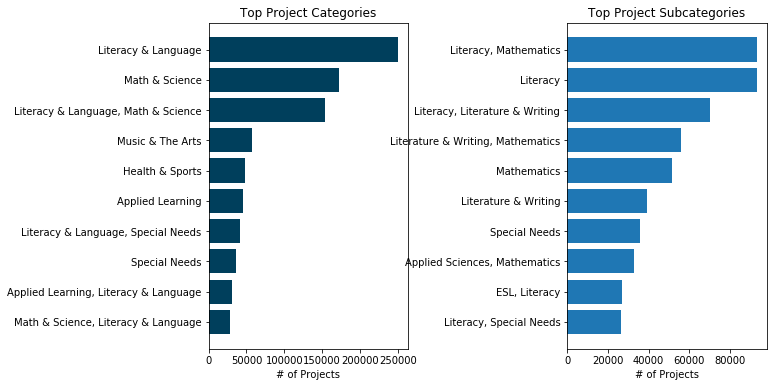

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw={'wspace': 0.8, 'hspace': 1})

x1 = projects['Project Subject Category Tree'].value_counts().sort_values().tail(10).index
y1 = projects['Project Subject Category Tree'].value_counts().sort_values().tail(10).values

x2 = projects['Project Subject Subcategory Tree'].value_counts().sort_values().tail(10).index
y2 = projects['Project Subject Subcategory Tree'].value_counts().sort_values().tail(10).values

axes[0].barh(x1,y1, color =  '#003f5c')


axes[0].set_xlabel('# of Projects')
axes[0].set_title('Top Project Categories')

axes[1].barh(x2,y2)
axes[1].set_title('Top Project Subcategories')
axes[1].set_xlabel('# of Projects')

### 2. How have the number of projects grown over time?

Over time from 2013 to 2017, the number of project requests have steadily risen, clearly showing increased popularity and importance of this platform.

In [59]:
# Converting posted date to date-time object, so that we can carry out date/time operations
projects['Project Posted Date'] = pd.to_datetime(projects['Project Posted Date'])
projects['Posted year'] = projects['Project Posted Date'].dt.year

Text(0,0.5,'# of Projects')

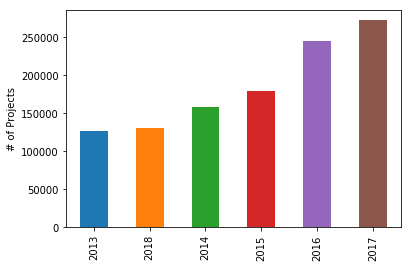

In [63]:
projects['Posted year'].value_counts().sort_values().plot(kind = 'bar')
plt.ylabel('# of Projects')

### 3. What is the current status of all the projects? 

About 70% of the projects get full funding, while remaining 30% are either still LIVE or have expired without full funding.

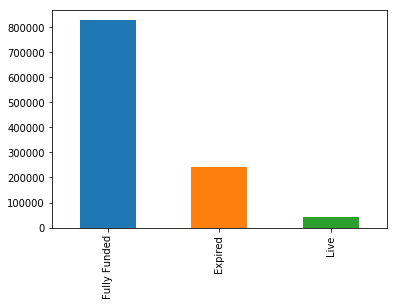

In [69]:
projects['Project Current Status'].value_counts().plot(kind = 'bar')

### b.) Donations

In [70]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [76]:
print ('Total number of donations are', donations['Donation ID'].nunique())

Total number of donations are 4687844


### 1. What are the top donation amounts?

Majority of donation amounts are whole numers such 25 USD, 50 USD or 10 USD. This makes sense as most of the option given by the website are typically whole numbers

Text(0.5,0,'Donation Amount')

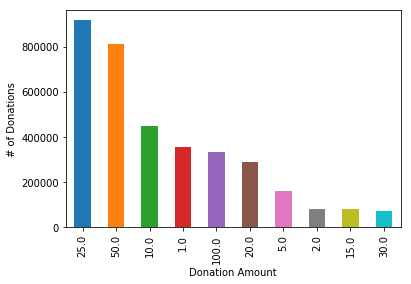

In [81]:
donations ['Donation Amount'].value_counts().head(10).plot(kind = 'bar')
plt.ylabel('# of Donations')
plt.xlabel('Donation Amount')

### 2. Which projects receive the maximum number and maximum amount of donations?

Project titled Vallecito StandUpKids Pilot Standing School! received the max # of donations. This porject deals with getting the right sized desks for their studens so that the students can move from one place to another easily. The project cost was 110K USD.

Interestingly the same project also had the maximum donation amount in USD.


In [96]:
donations_count_amount = donations.groupby('Project ID').agg({'Project ID' : 'count',\
                                     'Donation Amount' : 'sum'}).rename(columns={'Project ID' : "Total Donations",\
                                                                                 'Donation Amount' : "Total Amount"})

Text(0.5,1,'Project with maximum number of donations ')

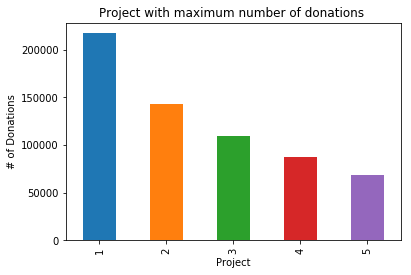

In [98]:
donations_count_amount['Total Donations'].value_counts()[:5].plot(kind='bar')
plt.xlabel('Project')
plt.ylabel('# of Donations')
plt.title ('Project with maximum number of donations ')

In [119]:
print ('The project with maximum # of donations is:')
projects[projects['Project ID'] == donations_count_amount['Total Donations'].idxmax()]

The project with maximum # of donations is:


,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Posted year
337798,c34218abf3fecd36be01305d67ed7fbb,e5d780f83322945f54d4ffb02765371b,7fe6dd0c1af5f911e9bc38030cfb4ced,1,Teacher-Led,Vallecito StandUpKids Pilot Standing School!,"In order for children to learn, they need to m...","In order for children to learn, they need to m...",My students need standing desks for every chil...,"Health & Sports, Literacy & Language","Health & Wellness, Literacy",Grades 3-5,Supplies,110075.19,2015-05-26,2015-10-24,Fully Funded,2015-08-12,2015


Text(0.5,1,'Project with maximum amount of donations ')

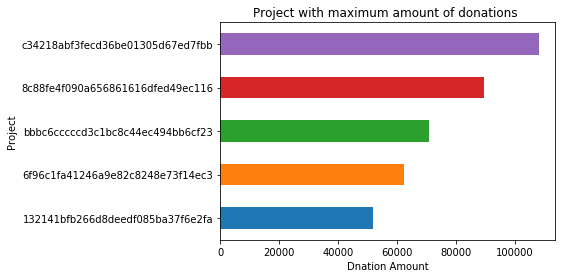

In [124]:
donations_count_amount['Total Amount'].sort_values().tail(5).plot(kind='barh')
plt.xlabel('Dnation Amount')
plt.ylabel('Project')
plt.title ('Project with maximum amount of donations ')

In [125]:
print ('The project with maximum donation amount is:')
projects[projects['Project ID'] == donations_count_amount['Total Amount'].idxmax()]

The project with maximum donation amount is:


,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,Posted year
337798,c34218abf3fecd36be01305d67ed7fbb,e5d780f83322945f54d4ffb02765371b,7fe6dd0c1af5f911e9bc38030cfb4ced,1,Teacher-Led,Vallecito StandUpKids Pilot Standing School!,"In order for children to learn, they need to m...","In order for children to learn, they need to m...",My students need standing desks for every chil...,"Health & Sports, Literacy & Language","Health & Wellness, Literacy",Grades 3-5,Supplies,110075.19,2015-05-26,2015-10-24,Fully Funded,2015-08-12,2015


### 3. What are the most frequent # of donations made by donors? 

Clearly as we can see most of the donors just make 1 donation. While a few others make 2 donations. There clearly is a huge potential for these donors who are donating only once to target again and motivate them to donate more. This also shows how sparse our data is. It is important to keep this in mind when we go into the recommendation systems


In [160]:
frequency_count = {}
for i in range (10):
    frequency_count[str(i+1)] = (donations['Donor ID'].value_counts()  ==  i+1).sum()

Text(0,0.5,'Frequency')

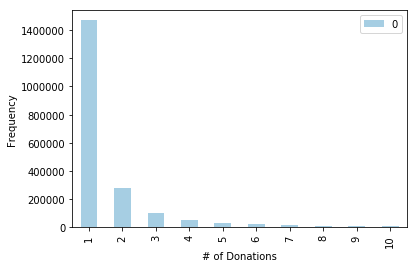

In [167]:
pd.DataFrame(frequency_count, index = [0]).T.plot(kind = 'bar',colormap = 'Paired')
plt.xlabel('# of Donations')
plt.ylabel('Frequency')

### 4. Which states receive the highest  total donation amounts?

As expected California, New York and Texas have the highest total donations, mostly due to the sheer size and population of these states. 

In [168]:
donations_donor_df = donations.merge(donors, on = 'Donor ID', how = 'inner')

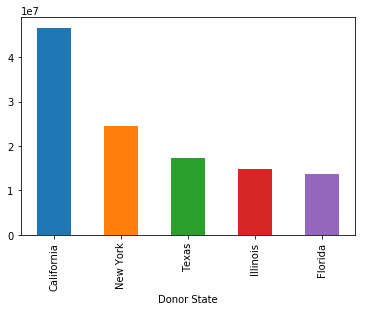

In [179]:
donations_donor_df.groupby('Donor State').agg({'Donation Amount':'sum'})['Donation Amount'].\
sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.ylabel('Total Donation Amount')

In [181]:
import io
from io import StringIO

# Let us first get the latitude and longitude for each State. We will then plot them on the map.

statesll=StringIO("""State,Latitude,Longitude
Alabama,32.806671,-86.791130
Alaska,61.370716,-152.404419
Arizona,33.729759,-111.431221
Arkansas,34.969704,-92.373123
California,36.116203,-119.681564
Colorado,39.059811,-105.311104
Connecticut,41.597782,-72.755371
Delaware,39.318523,-75.507141
District of Columbia,38.897438,-77.026817
Florida,27.766279,-81.686783
Georgia,33.040619,-83.643074
Hawaii,21.094318,-157.498337
Idaho,44.240459,-114.478828
Illinois,40.349457,-88.986137
Indiana,39.849426,-86.258278
Iowa,42.011539,-93.210526
Kansas,38.526600,-96.726486
Kentucky,37.668140,-84.670067
Louisiana,31.169546,-91.867805
Maine,44.693947,-69.381927
Maryland,39.063946,-76.802101
Massachusetts,42.230171,-71.530106
Michigan,43.326618,-84.536095
Minnesota,45.694454,-93.900192
Mississippi,32.741646,-89.678696
Missouri,38.456085,-92.288368
Montana,46.921925,-110.454353
Nebraska,41.125370,-98.268082
Nevada,38.313515,-117.055374
New Hampshire,43.452492,-71.563896
New Jersey,40.298904,-74.521011
New Mexico,34.840515,-106.248482
New York,42.165726,-74.948051
North Carolina,35.630066,-79.806419
North Dakota,47.528912,-99.784012
Ohio,40.388783,-82.764915
Oklahoma,35.565342,-96.928917
Oregon,44.572021,-122.070938
Pennsylvania,40.590752,-77.209755
Rhode Island,41.680893,-71.511780
South Carolina,33.856892,-80.945007
South Dakota,44.299782,-99.438828
Tennessee,35.747845,-86.692345
Texas,31.054487,-97.563461
Utah,40.150032,-111.862434
Vermont,44.045876,-72.710686
Virginia,37.769337,-78.169968
Washington,47.400902,-121.490494
West Virginia,38.491226,-80.954453
Wisconsin,44.268543,-89.616508
Wyoming,42.755966,-107.302490""")

sdf = pd.read_csv(statesll).rename(columns={'State':'Donor State'})

In [184]:
tempdf = donations_donor_df.groupby('Donor State').agg({'Donation Amount':'sum'})['Donation Amount'].\
sort_values(ascending = False).reset_index()
sdf = sdf.merge(tempdf, on = 'Donor State', how = 'inner')

In [190]:
# Plot the map to show the magnitude of donations from each state. Larger the circle, higher is the total donation amount
import folium  
from IPython.display import HTML, display

map4 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
for j, rown in sdf.iterrows():
    rown = list(rown)
    folium.CircleMarker([float(rown[1]), float(rown[2])], popup=rown[0]+": $"+str(int(rown[3])), radius=float(rown[3])*0.000001, color='red', fill=True).add_to(map4)
map4

### c.) Donors

In [191]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [192]:
print ('Total number of donors are', donors['Donor ID'].nunique())

Total number of donors are 2122640


# Content Based Filtering

### a.) Creating a sample data set

In [3]:


# #this piece of code converts Project_ID which is a 32-bit Hex int digits 10-1010
# # create column "project_id" with sequential integers
# f=len(projects)
# projects['project_id'] = np.nan
# g = list(range(10,f+10))
# g = pd.Series(g)
# projects['project_id'] = g.values

# Merge datasets
donations1 = donations.merge(donors, on="Donor ID", how="left")
df = donations1.merge(projects,on="Project ID", how="left")


#Create a sample from all datasets for a random sample of 50,000 donors

donor_ID = tuple(df['Donor ID'].unique())
donor_ID_sample = random.sample(donor_ID, 50000)

df_sample = df[df['Donor ID'].isin(donor_ID_sample)]
# df_sample.shape = ((588334, 27))
donations_sample = donations[donations['Donation ID'].isin(df_sample['Donation ID'])]
donors_sample = donors[donors['Donor ID'].isin(df_sample['Donor ID'])]
projects_sample = projects[projects['Project ID'].isin(df_sample['Project ID'])]
resources_sample = resources[resources['Project ID'].isin(df_sample['Project ID'])]
schools_sample = schools[schools['School ID'].isin(df_sample['School ID'])]
teachers_sample = teachers[teachers['Teacher ID'].isin(df_sample['Teacher ID'])]

print (df_sample.columns)
print ('donations:',donations_sample.shape,'\n','donors:',donors_sample.shape,'\n','projects:',projects_sample.shape,'\n',\
      'resources:',resources_sample.shape,'\n','schools:',schools_sample.shape,'\n','teachers:',teachers_sample.shape,'\n',\
      'df_sample:',df_sample.shape)

C:\Users\garga\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exporting sample data to csv

In [6]:
# donations_sample.to_csv(r'Datasets\Sample\Donations.csv')
# donors_sample.to_csv(r'Datasets\Sample\Donors.csv')
# projects_sample.to_csv(r'Datasets\Sample\Projects.csv')
# resources_sample.to_csv(r'Datasets\Sample\Resources.csv')
# schools_sample.to_csv(r'Datasets\Sample\Schools.csv')
# teachers_sample.to_csv(r'Datasets\Sample\Teachers.csv')
# df_sample.to_csv(r'Datasets\Sample\df_sample.csv')

## Importing sample data from csv

In [2]:
df_sample = pd.read_csv('df_sample.csv')
projects_sample = pd.read_csv('Projects.csv')

In [9]:
df_sample.sort_values(['Donation Received Date', 'Project Posted Date'],inplace=True)

In [3]:
#number of times a donor has donated - total number of donors for each such value
print (df_sample.groupby('Donor ID')['Donation ID'].count().value_counts().head())
print (df_sample.groupby(['Donor ID','Project ID'])['Donation ID'].count().value_counts().head())

1    36395
2     6832
3     2419
4     1212
5      733
Name: Donation ID, dtype: int64
1    87068
2     4759
3     1222
4      553
5      329
Name: Donation ID, dtype: int64


In [10]:
print(df_sample['Project Posted Date'].min())
print(df_sample['Project Posted Date'].max())
print(df_sample['Donation Received Date'].min())
print(df_sample['Donation Received Date'].max())

2013-01-01
2018-05-01
2012-10-13 16:01:39
2018-05-09 11:20:25


#### Is the donation date earlier than project posted date?

In [11]:
df_tmp = (pd.to_datetime(df_sample['Donation Received Date']) - pd.to_datetime(df_sample['Project Posted Date'])).dt.days
df_tmp = df_tmp.to_frame().rename(columns={0:'delay'})
df_tmp.loc[df_tmp['delay']<0, 'delay'].count()

111

There are 111 such projects where the donation date is before the project posted date. This is weird!!

In [12]:
# transform date into integer for better performance
date_feats = ['Project Posted Date','Project Expiration Date','Project Fully Funded Date','Donation Received Date']
for i in date_feats:
    df_sample[i] = pd.to_datetime(df_sample[i])
    df_sample[i] = (df_sample[i].astype(np.int64,copy=False)// 10 ** 9).astype(np.int32,copy=False)

KeyError: 'Project Expiration Date'

In [8]:
import math
# Deal with missing values
df_sample["Donation Amount"] = df_sample["Donation Amount"].fillna(0)

# Define event strength as the donated amount to a certain project
df_sample['eventStrength'] = df_sample['Donation Amount']

def smooth_donor_preference(x):
    return math.log(1+x, 2)
    
donations_full_df = df_sample \
                    .groupby(['Donor ID', 'Project ID'])['eventStrength'].sum() \
                    .apply(smooth_donor_preference).reset_index()
donations_full_df.head()

,Donor ID,Project ID,eventStrength
0,00008eec5aab2228652e22457881f2d0,24e7552d1a01bc2bfaaa1fef2fa42d28,5.672425
1,000110c8c5db5d760b313292dbfb24d1,845824318021765a8b3cfcb66c3169c9,4.700440
2,0001abd0c3f256bcdbc75116f2609355,06b1b00c918886cd4850c8ae1bae2d1c,4.700440
3,00027d3b680199e9350bc20fd2454a02,7e538ce993723396701312add5ac935f,4.700440
4,0004f42bf17585076f354d58485129be,e680292474d3073beb6c202c50783ef9,5.672425


In [5]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
#donations full df is a unique combination of a donor and a project. 
#Does not contain multiple donations by a donor to the same project.

donations_train_df, donations_test_df = train_test_split(donations_full_df, test_size=0.20, random_state=42)

print('# donations on Train set: %d' % len(donations_train_df))
print('# donations on Test set: %d' % len(donations_test_df))

#Indexing by Donor Id to speed up the searches during evaluation
donations_full_indexed_df = donations_full_df.set_index('Donor ID')
donations_train_indexed_df = donations_train_df.set_index('Donor ID')
donations_test_indexed_df = donations_test_df.set_index('Donor ID')

# donations on Train set: 75534
# donations on Test set: 18884


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing of text data
textfeats = ["Project Title","Project Essay"]
for cols in textfeats:
    projects_sample[cols] = projects_sample[cols].astype(str) 
    projects_sample[cols] = projects_sample[cols].astype(str).fillna('') # FILL NA
    projects_sample[cols] = projects_sample[cols].str.lower() # Lowercase all text, so that capitalized words dont get treated differently
 
text = projects_sample["Project Title"] + ' ' + projects_sample["Project Essay"]
vectorizer = TfidfVectorizer(strip_accents='unicode',
                             analyzer='word',
                             lowercase=True, # Convert all uppercase to lowercase
                             stop_words='english', # Remove commonly found english words ('it', 'a', 'the') which do not typically contain much signal
                             max_df = 0.9, # Only consider words that appear in fewer than max_df percent of all documents
                             # max_features=5000 # Maximum features to be extracted                    
                            )                        
project_ids = projects_sample['Project ID'].tolist()  #length = 327,439
tfidf_matrix = vectorizer.fit_transform(text)
tfidf_feature_names = vectorizer.get_feature_names()

In [7]:
#Build Donor Profile
import scipy
import sklearn 

def get_project_profile(project_id):
    idx = project_ids.index(project_id)
    project_profile = tfidf_matrix[idx:idx+1]
    return project_profile

def get_project_profiles(ids):
    project_profiles_list = [get_project_profile(x) for x in np.ravel([ids])]
    project_profiles = scipy.sparse.vstack(project_profiles_list)
    return project_profiles

def build_donors_profile(donor_id, donations_indexed_df):
    donations_donor_df = donations_indexed_df.loc[donor_id] #get all donations for a given donor
    donor_project_profiles = get_project_profiles(donations_donor_df['Project ID']) #get project profiles for the list of those donations
    donor_project_strengths = np.array(donations_donor_df['eventStrength']).reshape(-1,1) #get event stregth between each project and donor
    #Weighted average of project profiles by the donations strength
    donor_project_strengths_weighted_avg = np.sum(donor_project_profiles.multiply(donor_project_strengths), axis=0) / (np.sum(donor_project_strengths)+1)
    donor_profile_norm = sklearn.preprocessing.normalize(donor_project_strengths_weighted_avg)
    return donor_profile_norm

from tqdm import tqdm

#building donors profile for all donors using all projects
def build_donors_profiles(): 
    donations_indexed_df = donations_full_df[donations_full_df['Project ID'].isin(projects_sample['Project ID'])].set_index('Donor ID')
    donor_profiles = {}
    for donor_id in tqdm(donations_indexed_df.index.unique()):
        donor_profiles[donor_id] = build_donors_profile(donor_id, donations_indexed_df)
    return donor_profiles

donor_profiles = build_donors_profiles()
print("# of donors with profiles: %d" % len(donor_profiles))

100%|██████████| 50000/50000 [06:00<00:00, 138.65it/s]


# of donors with profiles: 50000


## Extract the top 100 donors

In [69]:
frequent_donors = df_sample['Donor ID'].value_counts().sort_values(ascending = False)[:10].reset_index()
list_frequent_donors = list(frequent_donors['index'])

Text(0.5,0,'Donors')

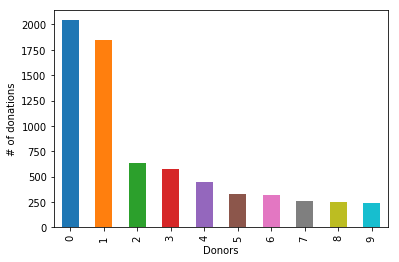

In [70]:
frequent_donors['Donor ID'][:10].plot(kind = 'bar')
plt.ylabel('# of donations')
plt.xlabel('Donors')

#### Total amount donated by top 100 donors

In [49]:
donations_amt_df = pd.DataFrame(columns = ['DonorID','donation_amt'])
for donor in list_frequent_donors:
    donation_amt = df_sample[df_sample['Donor ID'] == donor]['eventStrength'].sum()
    donations_amt_df.loc[len(donations_amt_df)] = [donor,donation_amt]

Text(0.5,1,'Total donations by top donors')

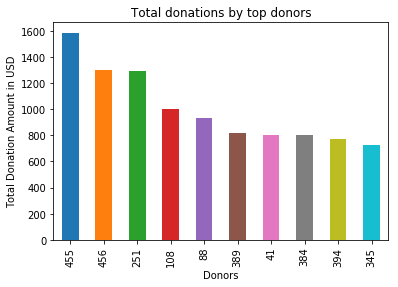

In [71]:
donations_amt_df['donation_amt'].sort_values(ascending = False)[:10].plot(kind='bar')
plt.ylabel('Total Donation Amount in USD')
plt.xlabel('Donors')
plt.title('Total donations by top donors')

Text(0.5,1,'Total donations by donors ranked 90-100')

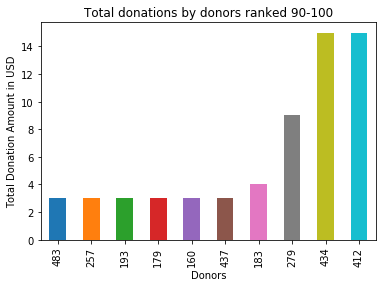

In [51]:
donations_amt_df['donation_amt'].sort_values(ascending = True)[:10].plot(kind='bar')
plt.ylabel('Total Donation Amount in USD')
plt.xlabel('Donors')
plt.title('Total donations by donors ranked 90-100')

## Creating class to identify cosine similarities and recommend projects 

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
class ContentBasedRecommender:
    
    MODEL_NAME = 'Content-Based'
    
    def __init__(self, projects_df=None):
        self.project_ids = project_ids
        self.projects_df = projects_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def _get_similar_projects_to_donor_profile(self, donor_id, topn=100):
        #Computes the cosine similarity between the donor profile and all project profiles
        cosine_similarities = cosine_similarity(donor_profiles[donor_id], tfidf_matrix)
        #Gets the top similar projects
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Sort the similar projects by similarity
        similar_projects = sorted([(project_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_projects
    
    def recommend_projects(self, donor_id, projects_to_ignore=[], topn=10, verbose=False):
        similar_projects = self._get_similar_projects_to_donor_profile(donor_id)
        #Ignores projects the donor has already donated
        similar_projects_filtered = list(filter(lambda x: x[0] not in projects_to_ignore, similar_projects))
        
        recommendations_df = pd.DataFrame(similar_projects_filtered, columns=['Project ID', 'recStrength']).head(topn)

        recommendations_df = recommendations_df.merge(self.projects_df, how = 'left', 
                                                    left_on = 'Project ID', 
                                                    right_on = 'Project ID')[['recStrength', 'Project ID', 'Project Title', 'Project Essay']]


        return recommendations_df

## Comparing the top 10 recommendations for 100 donors with their actual donations

In [73]:
recommended_match_count = pd.DataFrame(columns = ['DonorID','Match_count'])
for donor in list_frequent_donors:
    mydonor1 = donor
    mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
    # Creating the instance of class ContentBasedRecommender
    cbr_model = ContentBasedRecommender(projects_sample)
    top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project ID']
    projects_actually_donated = df_sample[df_sample['Donor ID'] == donor]['Project ID'].unique()
    count = 0
    for top_project in top_projects_recommended:
        if top_project in projects_actually_donated:
            count = count + 1 
    recommended_match_count.loc[len(recommended_match_count)] = [donor,count]    

In [54]:
print('Average match rate of top 10 recommendations against actual donations is ',recommended_match_count['Match_count'].mean())

Average match rate of top 10 recommendations against actual donations is  2.622


In [18]:
recommended_match_count.to_csv('Content_based_filtering_recommendations_match_rate.csv')

## 2 Examples to show that the donors for whom we have enough past data, content based filtering seems to work really well 

In [75]:
#for donor in list_frequent_donors:
mydonor1 = frequent_donors['index'][0]
mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
print(mydonor1_profile)

# Creating the instance of class ContentBasedRecommender
cbr_model = ContentBasedRecommender(projects_sample)
top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project Title']


       token  relevance
0     school   0.189307
1       help   0.158243
2   learning   0.158216
3    project   0.146039
4      learn   0.127768
5  classroom   0.118686
6   military   0.116404
7      class   0.114764
8       make   0.110813
9    college   0.110792


In [38]:
top_projects_recommended.to_csv('top_projects_recommended_1.csv')

In [68]:
#for donor in list_frequent_donors:
mydonor1 = frequent_donors['index'][100]
mydonor1_profile = pd.DataFrame(sorted(zip(tfidf_feature_names, 
                        donor_profiles[mydonor1].flatten().tolist()), 
                        key=lambda x: -x[1])[:10],
                        columns=['token', 'relevance'])
print(mydonor1_profile)

# Creating the instance of class ContentBasedRecommender
cbr_model = ContentBasedRecommender(projects_sample)
top_projects_recommended = cbr_model.recommend_projects(mydonor1)['Project Title']

        token  relevance
0     tablets   0.481746
1  technology   0.209758
2  integrated   0.194816
3      access   0.184066
4   available   0.183301
5        asus   0.158103
6   classroom   0.150564
7      online   0.147908
8        kids   0.141414
9       great   0.140309


In [66]:
print(top_projects_recommended)

0                      technology for my first graders
1                          tablets to improve reading 
2                          technology to keep current!
3          tablets for mrs. baker's second grade class
4    we're fired up for technology: amazon fire tab...
5               limitless "app"ortunities with tablets
6                            tablets for the 5th grade
7      technology in the classroom makes learning fun!
8    intuitive technology with tablets for esl stud...
9    feeding the fire (additional amazon fire tablets)
Name: Project Title, dtype: object


# Testing the accuracy of content based recommendation system

In [43]:
def get_projects_donated(donor_id, donations_df):
    # Get the donor's data and merge in the movie information.
    try:
        donated_projects = donations_df.loc[donor_id]['Project ID']
        return set(donated_projects if type(donated_projects) == pd.Series else [donated_projects])
    except KeyError:
        return []

#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS = 100

class ModelEvaluator:

    def get_not_donated_projects_sample(self, donor_id, sample_size, seed=42):
        donated_projects = get_projects_donated(donor_id, donations_full_indexed_df)
        all_projects = set(projects_sample['Project ID'])
        non_donated_projects = all_projects - donated_projects

        #random.seed(seed)
        non_donated_projects_sample = random.sample(non_donated_projects, sample_size)
        return set(non_donated_projects_sample)

    def _verify_hit_top_n(self, project_id, recommended_projects, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_projects) if c == project_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_donor(self, model, donor_id):
        #Getting the projects in test set
        donated_values_testset = donations_test_indexed_df.loc[donor_id]
        if type(donated_values_testset['Project ID']) == pd.Series:
            donor_donated_projects_testset = set(donated_values_testset['Project ID'])
        else:
            donor_donated_projects_testset = set([donated_values_testset['Project ID']])  
        donated_projects_count_testset = len(donor_donated_projects_testset) 

        #Getting a ranked recommendation list from a model for a given donor
        donor_recs_df = model.recommend_projects(donor_id,\
                                                 projects_to_ignore=get_projects_donated(donor_id,\
                                                                                         donations_train_indexed_df),\
                                                 topn=100000)

        hits_at_3_count = 0
        hits_at_5_count = 0
        hits_at_10_count = 0
        #For each project the donor has donated in test set
        for project_id in donor_donated_projects_testset:
            #Getting a random sample (100) projects the donor has not donated 
            #(to represent projects that are assumed to be no relevant to the donor)
            non_donated_projects_sample = self.get_not_donated_projects_sample(donor_id,\
                                                                               sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_PROJECTS,\
                                                                               seed=42)

            #Combining the current donated project with the 100 random projects
            projects_to_filter_recs = non_donated_projects_sample.union(set([project_id]))

            #Filtering only recommendations that are either the donated project or from a random sample of 100 non-donated projects
            valid_recs_df = donor_recs_df[donor_recs_df['Project ID'].isin(projects_to_filter_recs)]                    
            valid_recs = valid_recs_df['Project ID'].values
            #Verifying if the current donated project is among the Top-N recommended projects
            hit_at_3, index_at_3 = self._verify_hit_top_n(project_id, valid_recs, 3)
            hits_at_3_count += hit_at_3
            hit_at_5, index_at_5 = self._verify_hit_top_n(project_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(project_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the donated projects that are ranked among the Top-N recommended projects, 
        #when mixed with a set of non-relevant projects
        recall_at_3 = hits_at_3_count / float(donated_projects_count_testset)
        recall_at_5 = hits_at_5_count / float(donated_projects_count_testset)
        recall_at_10 = hits_at_10_count / float(donated_projects_count_testset)

        donor_metrics = {'hits@3_count':hits_at_3_count, 
                         'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'donated_count': donated_projects_count_testset,
                          'recall@3': recall_at_3,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return donor_metrics

    # Function to take the entire model as input.
    def evaluate_model(self, model):
        #print('Running evaluation for donors')
        people_metrics = []
        for idx, donor_id in enumerate(list(donations_test_indexed_df.index.unique().values)):
            #print ('hello')
            #if idx > 200:
                #print('%d donors processed' % idx)
                #break;
            donor_metrics = self.evaluate_model_for_donor(model, donor_id)  
            donor_metrics['_donor_id'] = donor_id
            people_metrics.append(donor_metrics)
        print('%d donors processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('donated_count', ascending=False)
        
        global_recall_at_3 = detailed_results_df['hits@3_count'].sum() / float(detailed_results_df['donated_count'].sum())
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['donated_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['donated_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@3': global_recall_at_3,
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        # Returning global_metrics and detailed results_df
        return global_metrics, detailed_results_df
    
# Creating the instance of class ModelEvaluator
model_evaluator = ModelEvaluator()

In [44]:
print('Evaluating Content-Based Filtering model...')

# Calling evaluate_model function in the class. Pass the content based recommendation model we created above.
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(cbr_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df = cb_detailed_results_df[['_donor_id', 'donated_count', "hits@3_count", 'hits@5_count','hits@10_count', 
                                                'recall@3','recall@5','recall@10']]
cb_detailed_results_df.head(10)

Evaluating Content-Based Filtering model...
13391 donors processed

Global metrics:
{'modelName': 'Content-Based', 'recall@3': 0.8320271128998094, 'recall@5': 0.8320271128998094, 'recall@10': 0.8320271128998094}


,_donor_id,donated_count,hits@3_count,hits@5_count,hits@10_count,recall@3,recall@5,recall@10
122,67cb61233835275f98075521d5afa420,233,6,6,6,0.025751,0.025751,0.025751
89,0d90f689080b0d740a62a51c7f362829,212,20,20,20,0.094340,0.094340,0.094340
10,1d74dad1dc92b0ba0b6a787d3a793612,116,0,0,0,0.000000,0.000000,0.000000
449,8d275299cdaa27a714f0e49588edf641,82,3,3,3,0.036585,0.036585,0.036585
469,6f5ee119c72627f4078e0f63cc4a1fdc,63,0,0,0,0.000000,0.000000,0.000000
284,f0ea78ff6ce64e89e929948a60ea09d9,61,0,0,0,0.000000,0.000000,0.000000
932,4b9004c4531d6c0c10aa2fe10cd4cbaa,52,1,1,1,0.019231,0.019231,0.019231
184,090bdfd4bc540d85623ae2ad597c393c,48,1,1,1,0.020833,0.020833,0.020833
209,533bb08d99eaa177339004b1c613e002,46,0,0,0,0.000000,0.000000,0.000000
104,7e1f1954f5332107f5e87c5c4742c227,42,1,1,1,0.023810,0.023810,0.023810


In [30]:
cb_detailed_results_df.head(10)

NameError: name 'cb_detailed_results_df' is not defined

# Collaborative Filtering

### Step 1: Create donor-project matrix

In [35]:
#Creating a sparse pivot table with donors in rows and projects in columns
donors_projects_pivot_matrix_df = donations_full_df_sample.pivot(index='Donor ID',\
                                                          columns='Project ID',\
                                                          values='eventStrength').fillna(0)\

MemoryError: 

In [42]:
donors_projects_pivot_matrix_df = donations_full_df_sample.pivot(index = 'Donor ID',columns = 'Project ID',values='eventStrength').fillna(0)

In [37]:
donations_full_df_sample = donations_full_df[:10000]

In [51]:

donors_projects_pivot_matrix_df.iloc[30].sum()

5.672425341971496

In [53]:
unique_donors = donations_full_df['Donor ID'].unique()